#### Imported Numpy to read the data as an array 
#### Imported Matplotlib.pyplot to plot or graph the data
#### Imported Pandas to read the data from csv file

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

In [87]:
customers = pd.read_csv('Ecommerce_Customers.csv')

### Structure of the Data

In [88]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### seperated states from the address and created a column named "State"

In [89]:
df = pd.DataFrame(customers)
df["State"] =  df["Address"].str.split(",", expand=True)[1].str.split(" ", expand=True)[1]
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,MI
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,CA
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,DC
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,OH
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,PR
...,...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438,UT
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004,CA
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145,TN
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510,TX


### Summary Statistics

In [90]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [91]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
 8   State                 470 non-null    object 
dtypes: float64(5), object(4)
memory usage: 35.3+ KB


## Exploratory Data Analysis

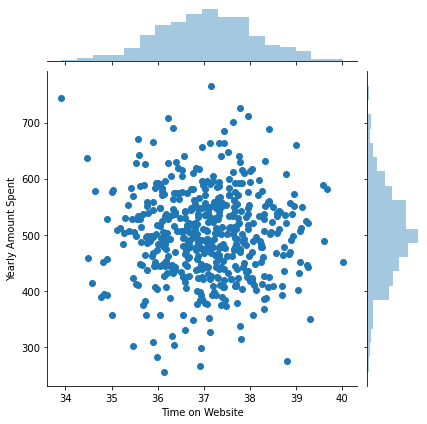

In [92]:
sns.jointplot(customers['Time on Website' ],customers['Yearly Amount Spent'])
#we have a circular shape, there is not a significant correlation between these two variables.

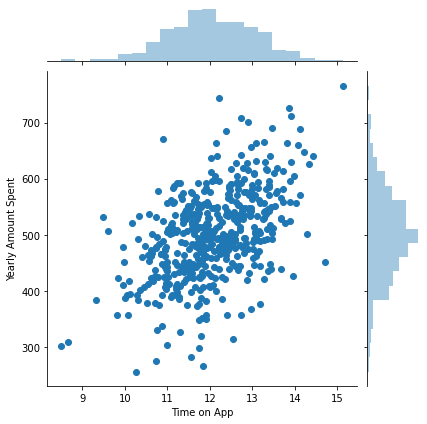

In [93]:
sns.jointplot(customers['Time on App'],customers['Yearly Amount Spent'])
#there is a correlation between the amount of time spent on the app and the amount of money spent.

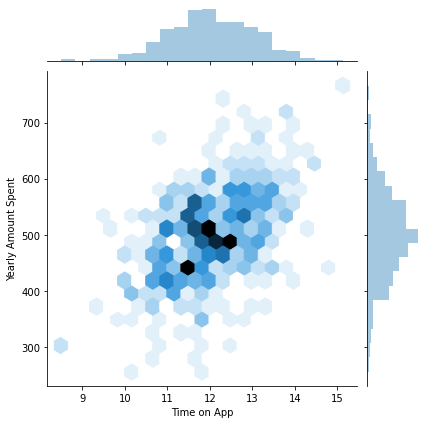

In [94]:
sns.jointplot(customers['Time on App'],customers['Yearly Amount Spent'],kind='hex')


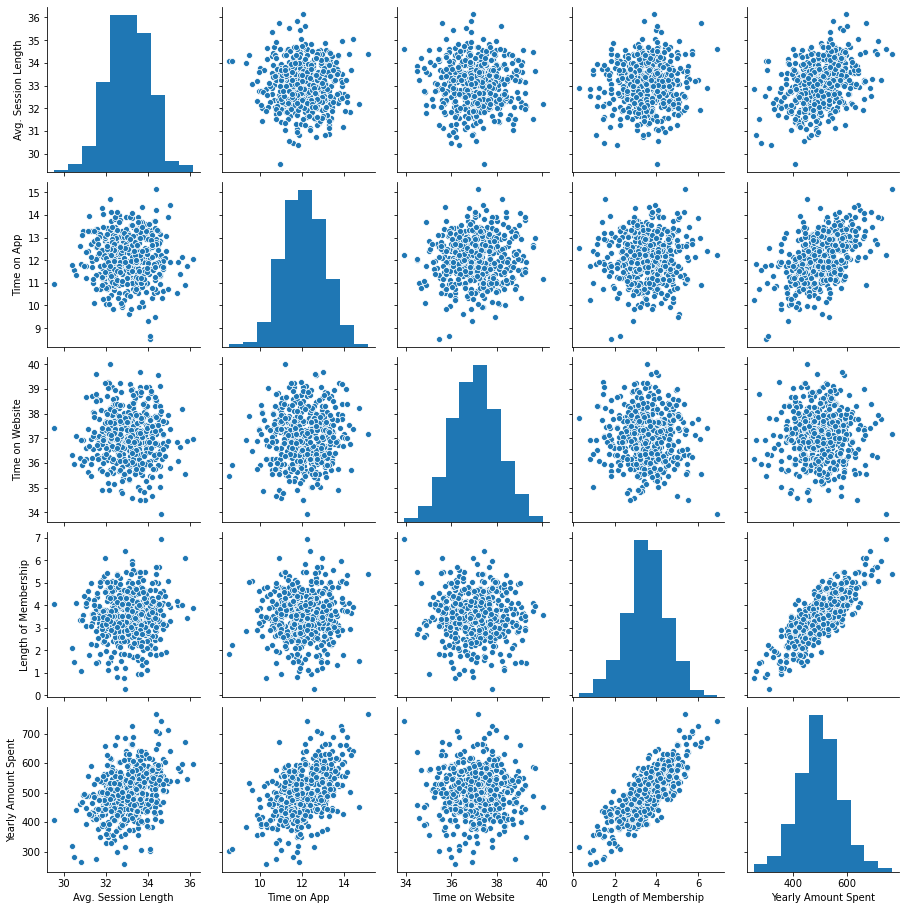

In [95]:
#This shows that lenghth of membership is the most effective factor on yearly amount spent.
sns.pairplot(customers)

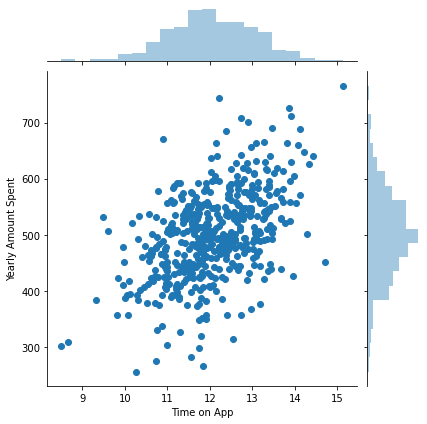

In [96]:
sns.jointplot(customers['Time on App'],customers['Yearly Amount Spent'])

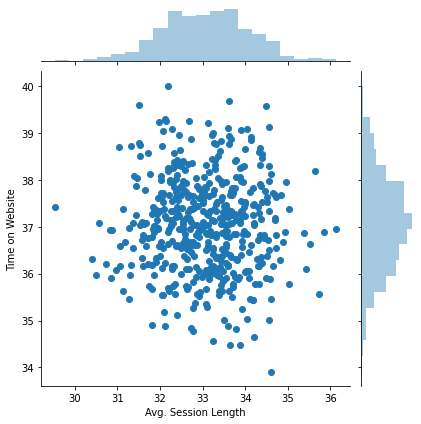

In [97]:
sns.jointplot(customers['Avg. Session Length' ],customers['Time on Website'])

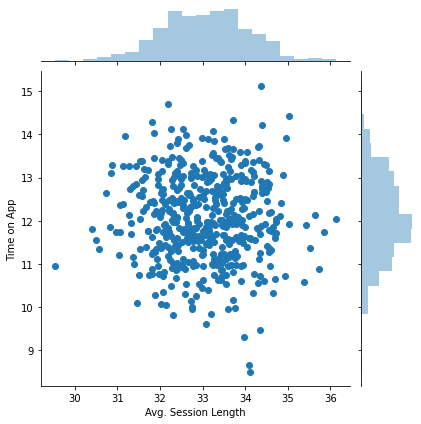

In [98]:
sns.jointplot(customers['Avg. Session Length' ],customers['Time on App'])

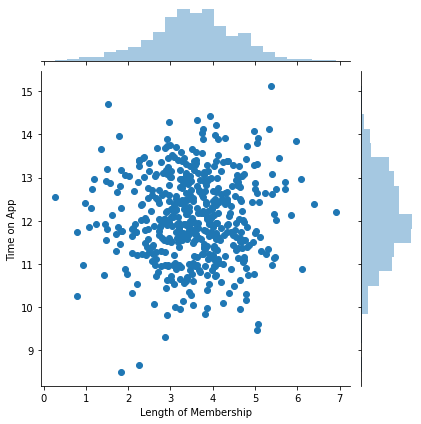

In [99]:
sns.jointplot(customers['Length of Membership' ],customers['Time on App'])

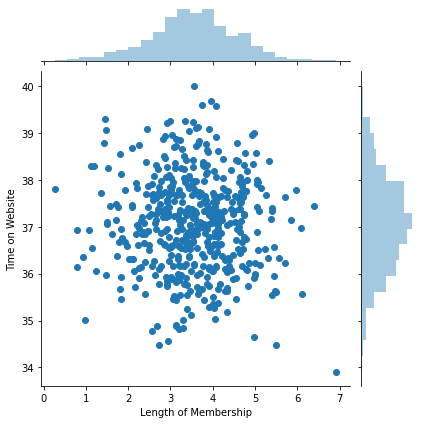

In [100]:
sns.jointplot(customers['Length of Membership' ],customers['Time on Website'])

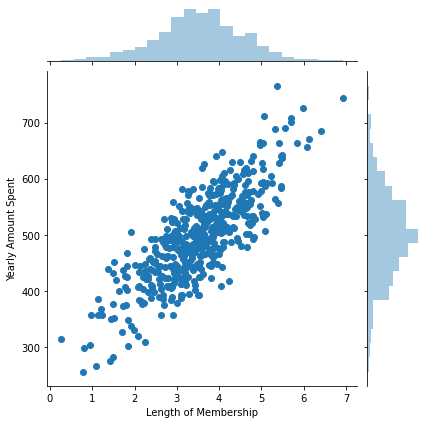

In [101]:
sns.jointplot(customers['Length of Membership' ],customers['Yearly Amount Spent'])

## Model Training

In [102]:
#Using Linear Regression to predict the amount of money spent based on the other variable.

x=customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=customers['Yearly Amount Spent']

#Splitting the data into test data and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Creating a Linear Regression model
lm = LinearRegression()
lm.fit(x_train,y_train)
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.478617
Time on App,38.695114
Time on Website,0.534208
Length of Membership,61.543654


## Model Evaluation


<div>
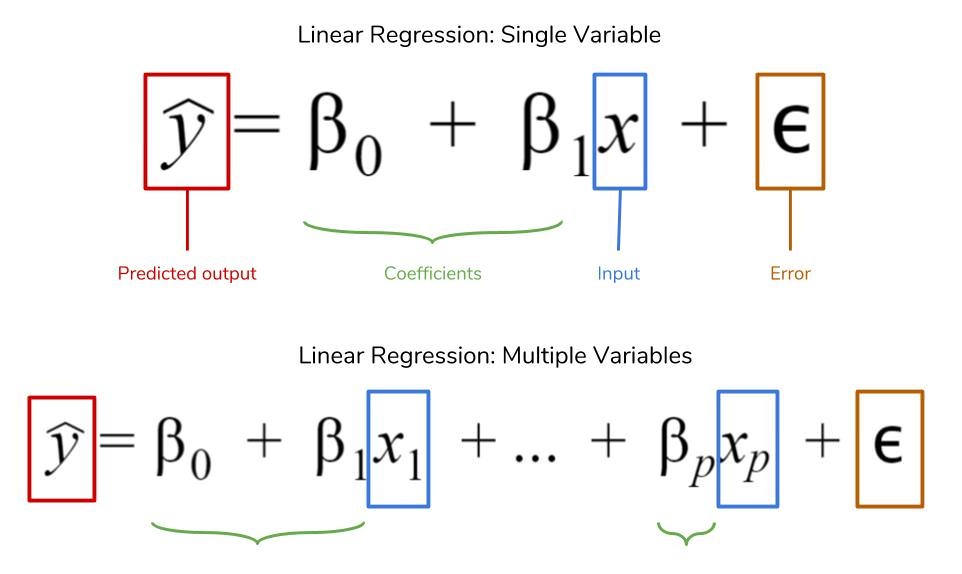
</div>

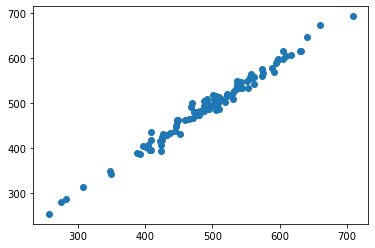

In [103]:
predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)

In [104]:
#Evaluating the results using different metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MAE: 8.590517436879482
MSE: 120.29536136396536


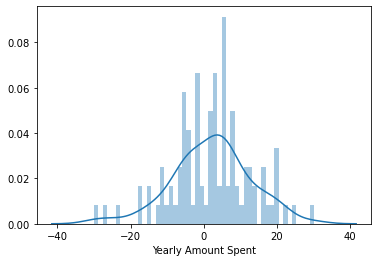

In [105]:
#plotting the distribution of the prediction erros. ]
#Since the error has a normal distribution, the model is considered suitable for the data.
sns.distplot((y_test-predictions),bins=50);